In [3]:
import re
import unicodedata
import pandas as pd
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
import matplotlib.pyplot as plt


def clean_text(teks: str) -> str:
    if teks is None:
        return ""
    teks = unicodedata.normalize("NFC", teks)
    teks = teks.casefold()
    teks = re.sub(r"https?://\S+|www\.\S+", " ", teks)
    teks = re.sub(r"<[^>]+>", " ", teks)
    teks = re.sub(r"\b(a|href|src|class|id|target|rel|style|div|span)\b", " ", teks)
    teks = re.sub(r"[^\w\s]", " ", teks)
    teks = re.sub(r"\b\d+\b", " ", teks)
    teks = re.sub(r"\s+", " ", teks).strip()
    return teks

def parsing(teks: str):
    return re.findall(r"\b\w+\b", teks)

factory = StemmerFactory()
stemmer = factory.create_stemmer()

def stemming(tokens):
    return [stemmer.stem(token) for token in tokens]

stop_factory = StopWordRemoverFactory()
stopword_list = set(stop_factory.get_stop_words())

def stopword_removal(tokens):
    return [token for token in tokens if token not in stopword_list]



In [4]:

file_path = "../CPMK_2/dataset_youtube_comment.csv" 
df_input = pd.read_csv(file_path)

df_input.drop_duplicates(subset=["Comment"], inplace=True)

hasil_comment = []

for teks in df_input["Comment"]:
    teks_cf = clean_text(teks)
    tokens = parsing(teks_cf)
    tokens_stemmed = stemming(tokens)
    tokens_filtered = stopword_removal(tokens_stemmed)
    teks_final = " ".join(tokens_filtered)
    hasil_comment.append(teks_final)

df_input["Comment"] = hasil_comment

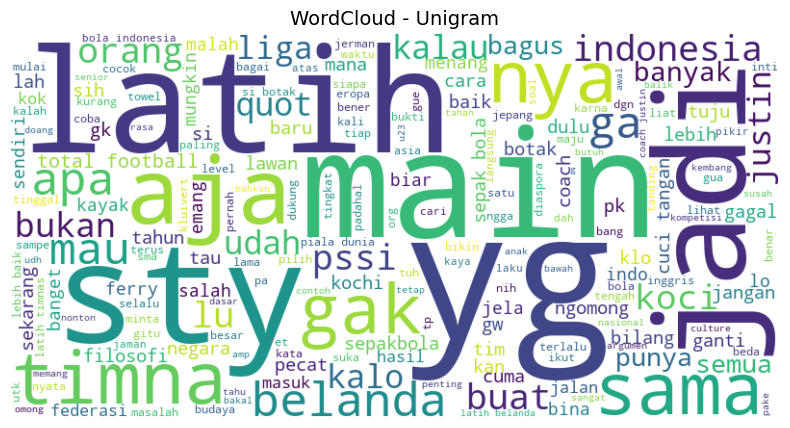

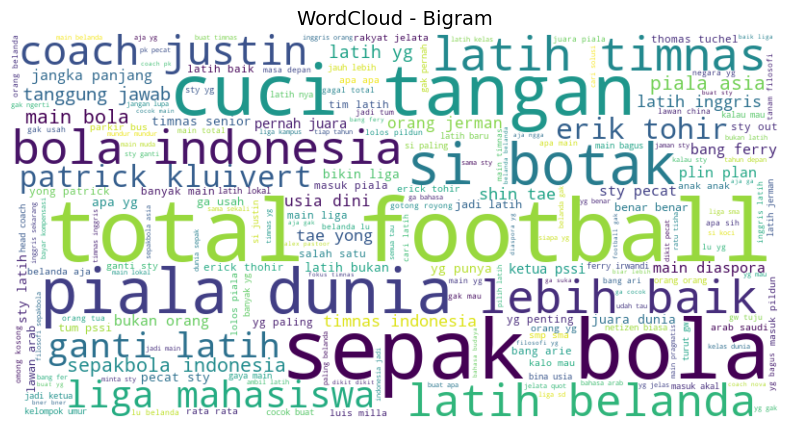

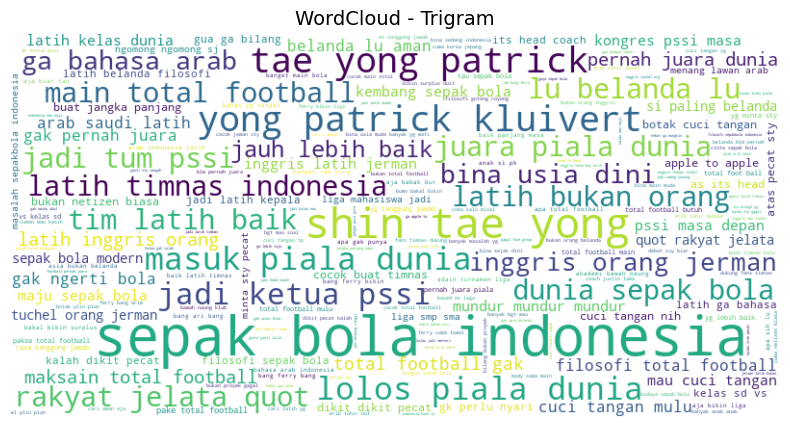

In [5]:
# Bigram
vectorizer_bigram = CountVectorizer(ngram_range=(2, 2))
X_bigram = vectorizer_bigram.fit_transform(df_input["Comment"])
bigram_freq = dict(zip(vectorizer_bigram.get_feature_names_out(), X_bigram.toarray().sum(axis=0)))

# Trigram
vectorizer_trigram = CountVectorizer(ngram_range=(3, 3))
X_trigram = vectorizer_trigram.fit_transform(df_input["Comment"])
trigram_freq = dict(zip(vectorizer_trigram.get_feature_names_out(), X_trigram.toarray().sum(axis=0)))


all_text = " ".join(df_input["Comment"].tolist())

# WordCloud unigram
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(all_text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Unigram", fontsize=14)
plt.show()

# WordCloud bigram
wordcloud_bigram = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(bigram_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_bigram, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Bigram", fontsize=14)
plt.show()

# WordCloud trigram
wordcloud_trigram = WordCloud(width=800, height=400, background_color="white").generate_from_frequencies(trigram_freq)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_trigram, interpolation="bilinear")
plt.axis("off")
plt.title("WordCloud - Trigram", fontsize=14)
plt.show()

In [6]:
output_file = "hasil_preprocessing.csv"
df_input.to_csv(output_file, index=False)
print(f"✅ File '{output_file}' berhasil dibuat!")
print(f"📊 Total komentar unik: {len(df_input)}")

✅ File 'hasil_preprocessing.csv' berhasil dibuat!
📊 Total komentar unik: 1486
